# Importing Libraries

In [1]:
import csv
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from prettytable import PrettyTable
import warnings
warnings.filterwarnings("ignore")

### Importing Data

In [2]:
import csv
rows = []
#to open and read the csv file
with open("Students_Data_final .csv", 'r') as file:
  csvreader = csv.reader(file)
  header = next(csvreader)
  for row in csvreader:
    rows.append(row)
print(header) # header contains the names of columns
for i in range(10):
  print(rows[i]) # rows contains the all rows in dataset and each value is in string

['ID', 'Ph', 'Calcium(in ppm)', 'Magnesium(in ppm)', 'Chlorine(in ppm)', 'Benzene(in ppb)', 'THM(in ppb)', 'Copper(in ppm)', 'Nitrate(in ppm)', 'Drinking Purpose', 'Ailments', 'Cement Industry Purpose', 'Irrigation Purpose']
['1', '6.32199', '40.46381', '37.11756', '125.76967', '1.29794', '4.26769', '0.08466', '47.55646', 'No', 'Breathing Difficulty,Nausea,Diarrhoea,Methemoglobinemia', 'No', 'Yes']
['2', '1.11703', '489.13508', '394.47085', '2.82537', '138.14883', '225.7977', '60.77358', '7.40217', 'Yes', 'Safe', 'Yes', 'Yes']
['3', '7.0739', '144.91595', '92.40137', '66.91135', '229.14941', '318.90759', '25.77226', '209.05062', 'Yes', 'Safe', 'Yes', 'Yes']
['4', '7.62976', '54.05074', '18.43207', '2.63521', '1.87751', '2.64588', '1.22626', '9.19097', 'Yes', 'Safe', 'Yes', 'No']
['5', '2.00241', '378.86847', '80.60606', '347.01476', '70.69219', '274.25715', '16.51665', '360.53748', 'No', 'Breathing Difficulty,Burns in mouth and throat,Stomach pain,Nausea,Diarrhoea,Leukaemia,Anaemia,Bla

### Pre-Processing

In [3]:
# to change the datatype of value to necessary datatype and to round the float number to 2 decimals
# Ailments are multiple in dataset in a row so taking each ailment only one time
for i in range(len(rows)):
  rows[i][0]=int(rows[i][0])
  rows[i][1]=round(float(rows[i][1]),2)
  rows[i][2]=round(float(rows[i][2]),2)
  rows[i][3]=round(float(rows[i][3]),2)
  rows[i][4]=round(float(rows[i][4]),2)
  rows[i][5]=round(float(rows[i][5]),2)
  rows[i][6]=round(float(rows[i][6]),2)
  rows[i][7]=round(float(rows[i][7]),2)
  rows[i][8]=round(float(rows[i][8]),2)
  l=rows[i][10].split(",")
  l=list(set(l))
  rows[i][10]=','.join(l)
for i in range(10):
  print(rows[i])

[1, 6.32, 40.46, 37.12, 125.77, 1.3, 4.27, 0.08, 47.56, 'No', 'Diarrhoea,Nausea,Breathing Difficulty,Methemoglobinemia', 'No', 'Yes']
[2, 1.12, 489.14, 394.47, 2.83, 138.15, 225.8, 60.77, 7.4, 'Yes', 'Safe', 'Yes', 'Yes']
[3, 7.07, 144.92, 92.4, 66.91, 229.15, 318.91, 25.77, 209.05, 'Yes', 'Safe', 'Yes', 'Yes']
[4, 7.63, 54.05, 18.43, 2.64, 1.88, 2.65, 1.23, 9.19, 'Yes', 'Safe', 'Yes', 'No']
[5, 2.0, 378.87, 80.61, 347.01, 70.69, 274.26, 16.52, 360.54, 'No', 'Breathing Difficulty,Anaemia,Stomach pain,Nausea,Burns in mouth and throat,Bladder Cancer,Methemoglobinemia,Diarrhoea,Leukaemia', 'No', 'No']
[6, 2.26, 480.41, 224.66, 138.56, 2.03, 215.41, 79.71, 375.32, 'No', 'Breathing Difficulty,Stomach pain,Nausea,Burns in mouth and throat,Bladder Cancer,Methemoglobinemia,Diarrhoea', 'No', 'No']
[7, 8.34, 43.37, 16.02, 3.19, 1.65, 3.32, 1.65, 4.64, 'Yes', 'Safe', 'Yes', 'No']
[8, 12.91, 178.35, 338.96, 344.27, 84.55, 255.88, 60.86, 485.47, 'No', 'Anaemia,Stomach pain,Nausea,Burns in mouth and

### Creation of DataFrame from data

In [4]:
import pandas as pd
df=pd.DataFrame(rows) # converting into dataframe -> columns names are from 0 to 12
df.drop(columns=[0],inplace=True) #removing the 1st column(ID)

In [5]:
df

,1,2,3,4,5,6,7,8,9,10,11,12
0,6.32,40.46,37.12,125.77,1.30,4.27,0.08,47.56,No,"Diarrhoea,Nausea,Breathing Difficulty,Methemog...",No,Yes
1,1.12,489.14,394.47,2.83,138.15,225.80,60.77,7.40,Yes,Safe,Yes,Yes
2,7.07,144.92,92.40,66.91,229.15,318.91,25.77,209.05,Yes,Safe,Yes,Yes
3,7.63,54.05,18.43,2.64,1.88,2.65,1.23,9.19,Yes,Safe,Yes,No
4,2.00,378.87,80.61,347.01,70.69,274.26,16.52,360.54,No,"Breathing Difficulty,Anaemia,Stomach pain,Naus...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
13040,7.67,43.06,16.36,3.16,4.95,4.17,0.29,6.95,Yes,Safe,Yes,No
13041,2.46,145.75,201.09,492.57,165.75,281.09,68.11,364.10,No,"Breathing Difficulty,Anaemia,Stomach pain,Naus...",No,No
13042,10.75,110.05,99.68,165.52,137.66,184.49,29.32,68.67,No,"Anaemia,Stomach pain,Nausea,Burns in mouth and...",Yes,No
13043,7.69,20.13,18.79,3.77,2.05,7.89,0.17,0.04,Yes,Safe,Yes,No


In [6]:
#changing column names like in dataset
df.rename(columns = {1: 'Ph',2:'Calcium(in ppm)',3:'Magnesium(in ppm)',4:'Chlorine(in ppm)',5:'Benzene(in ppb)',6:'THM(in ppb)',7:'Copper(in ppm)',8:'Nitrate(in ppm)',9:'Drinking Purpose',10:'Ailments',11:'Cement Industry Purpose',12:'Irrigation Purpose'}, inplace = True)
df

,Ph,Calcium(in ppm),Magnesium(in ppm),Chlorine(in ppm),Benzene(in ppb),THM(in ppb),Copper(in ppm),Nitrate(in ppm),Drinking Purpose,Ailments,Cement Industry Purpose,Irrigation Purpose
0,6.32,40.46,37.12,125.77,1.30,4.27,0.08,47.56,No,"Diarrhoea,Nausea,Breathing Difficulty,Methemog...",No,Yes
1,1.12,489.14,394.47,2.83,138.15,225.80,60.77,7.40,Yes,Safe,Yes,Yes
2,7.07,144.92,92.40,66.91,229.15,318.91,25.77,209.05,Yes,Safe,Yes,Yes
3,7.63,54.05,18.43,2.64,1.88,2.65,1.23,9.19,Yes,Safe,Yes,No
4,2.00,378.87,80.61,347.01,70.69,274.26,16.52,360.54,No,"Breathing Difficulty,Anaemia,Stomach pain,Naus...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
13040,7.67,43.06,16.36,3.16,4.95,4.17,0.29,6.95,Yes,Safe,Yes,No
13041,2.46,145.75,201.09,492.57,165.75,281.09,68.11,364.10,No,"Breathing Difficulty,Anaemia,Stomach pain,Naus...",No,No
13042,10.75,110.05,99.68,165.52,137.66,184.49,29.32,68.67,No,"Anaemia,Stomach pain,Nausea,Burns in mouth and...",Yes,No
13043,7.69,20.13,18.79,3.77,2.05,7.89,0.17,0.04,Yes,Safe,Yes,No


In [7]:
df.head(10) # displays first 10 rows

,Ph,Calcium(in ppm),Magnesium(in ppm),Chlorine(in ppm),Benzene(in ppb),THM(in ppb),Copper(in ppm),Nitrate(in ppm),Drinking Purpose,Ailments,Cement Industry Purpose,Irrigation Purpose
0,6.32,40.46,37.12,125.77,1.30,4.27,0.08,47.56,No,"Diarrhoea,Nausea,Breathing Difficulty,Methemog...",No,Yes
1,1.12,489.14,394.47,2.83,138.15,225.80,60.77,7.40,Yes,Safe,Yes,Yes
2,7.07,144.92,92.40,66.91,229.15,318.91,25.77,209.05,Yes,Safe,Yes,Yes
3,7.63,54.05,18.43,2.64,1.88,2.65,1.23,9.19,Yes,Safe,Yes,No
4,2.00,378.87,80.61,347.01,70.69,274.26,16.52,360.54,No,"Breathing Difficulty,Anaemia,Stomach pain,Naus...",No,No
5,2.26,480.41,224.66,138.56,2.03,215.41,79.71,375.32,No,"Breathing Difficulty,Stomach pain,Nausea,Burns...",No,No
6,8.34,43.37,16.02,3.19,1.65,3.32,1.65,4.64,Yes,Safe,Yes,No
7,12.91,178.35,338.96,344.27,84.55,255.88,60.86,485.47,No,"Anaemia,Stomach pain,Nausea,Burns in mouth and...",No,No
8,6.78,11.53,288.38,287.67,256.86,63.03,85.17,134.51,No,"Anaemia,Nausea,Bladder Cancer,Methemoglobinemi...",No,No
9,6.34,35.41,35.84,55.93,2.70,0.79,0.05,136.75,No,"Diarrhoea,Nausea,Breathing Difficulty,Methemog...",No,Yes


In [8]:
df.tail(10) # displays last 10 rows

,Ph,Calcium(in ppm),Magnesium(in ppm),Chlorine(in ppm),Benzene(in ppb),THM(in ppb),Copper(in ppm),Nitrate(in ppm),Drinking Purpose,Ailments,Cement Industry Purpose,Irrigation Purpose
13035,5.05,58.52,37.21,105.18,4.29,6.26,0.15,47.07,No,"Diarrhoea,Nausea,Breathing Difficulty,Methemog...",No,Yes
13036,5.20,36.79,37.03,91.88,3.45,9.08,0.02,141.78,No,"Diarrhoea,Nausea,Breathing Difficulty,Methemog...",No,Yes
13037,5.76,33.79,55.23,51.99,0.87,6.97,0.05,125.75,No,"Diarrhoea,Nausea,Breathing Difficulty,Methemog...",No,Yes
13038,7.61,25.37,12.83,3.19,4.33,5.12,1.03,1.66,Yes,Safe,Yes,No
13039,6.62,47.02,35.23,14.87,66.85,269.77,25.71,396.52,Yes,Safe,Yes,Yes
13040,7.67,43.06,16.36,3.16,4.95,4.17,0.29,6.95,Yes,Safe,Yes,No
13041,2.46,145.75,201.09,492.57,165.75,281.09,68.11,364.10,No,"Breathing Difficulty,Anaemia,Stomach pain,Naus...",No,No
13042,10.75,110.05,99.68,165.52,137.66,184.49,29.32,68.67,No,"Anaemia,Stomach pain,Nausea,Burns in mouth and...",Yes,No
13043,7.69,20.13,18.79,3.77,2.05,7.89,0.17,0.04,Yes,Safe,Yes,No
13044,8.61,31.45,73.96,67.16,124.52,54.71,8.75,273.74,No,"Anaemia,Nausea,Bladder Cancer,Methemoglobinemi...",Yes,No


In [9]:
df.dtypes # displays type of each column

Ph                         float64
Calcium(in ppm)            float64
Magnesium(in ppm)          float64
Chlorine(in ppm)           float64
Benzene(in ppb)            float64
THM(in ppb)                float64
Copper(in ppm)             float64
Nitrate(in ppm)            float64
Drinking Purpose            object
Ailments                    object
Cement Industry Purpose     object
Irrigation Purpose          object
dtype: object

### Train Test Split

In [10]:
X = df.drop(columns=['Drinking Purpose','Ailments','Cement Industry Purpose','Irrigation Purpose']) #input data
y5=df[['Drinking Purpose','Ailments','Cement Industry Purpose','Irrigation Purpose']] # output data

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y5_train, y5_test = train_test_split(X, y5, test_size=0.3) #splitting the input and output into train dataset and test dataset
y1_train=y5_train['Drinking Purpose']
y1_test=y5_test['Drinking Purpose']
y2_train=y5_train['Ailments']
y2_test=y5_test['Ailments']
y3_train=y5_train['Cement Industry Purpose']
y3_test=y5_test['Cement Industry Purpose']
y4_train=y5_train['Irrigation Purpose']
y4_test=y5_test['Irrigation Purpose']
y5_train1=y5_train[['Drinking Purpose','Ailments']]
y5_test1=y5_test[['Drinking Purpose','Ailments']]
y5_train1['ail']=y5_train1['Drinking Purpose']+y5_train1['Ailments'] # warning occurs when the data get changes in dataframe
y_train=y5_train1.drop(columns=['Drinking Purpose','Ailments'])
y5_train1.drop(columns=['ail'],inplace=True)
y5_test1['ail']=y5_test1['Drinking Purpose']+y5_test1['Ailments'] # warning occurs when the data get changes in dataframe
y_test=y5_test1.drop(columns=['Drinking Purpose','Ailments'])
y5_test1.drop(columns=['ail'],inplace=True)
y5_train['ail']=y5_train['Drinking Purpose']+y5_train['Ailments']+y5_train['Cement Industry Purpose']+y5_train['Irrigation Purpose'] # warning occurs when the data get changes in dataframe
y6_train=y5_train.drop(columns=['Drinking Purpose','Ailments','Cement Industry Purpose','Irrigation Purpose'])
y5_train.drop(columns=['ail'],inplace=True)
y5_test['ail']=y5_test['Drinking Purpose']+y5_test['Ailments']+y5_test['Cement Industry Purpose']+y5_test['Irrigation Purpose'] # warning occurs when the data get changes in dataframe
y6_test=y5_test.drop(columns=['Drinking Purpose','Ailments','Cement Industry Purpose','Irrigation Purpose'])
y5_test.drop(columns=['ail'],inplace=True)

### Random Forest Algorithm

In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 100)

#### Fitting the model and predicting the accuracies

In [14]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
#Four features-Drinking Purpose,Ailments,Cement Industry Purpose,Irrigation Purpose
rf1=classifier_RF.fit(X_train, y5_train) # for fitting the dataset
rf1_pre=rf1.predict(X_test) # predicts the outputs for test input

In [16]:
#Accuracy for four features
pre1=pd.DataFrame(rf1_pre, columns=['Drinking Purpose','Ailments','Cement Industry Purpose','Irrigation Purpose'])
pre1['ail']=pre1['Drinking Purpose']+pre1['Ailments']+pre1['Cement Industry Purpose']+pre1['Irrigation Purpose']
pre2=pre1.drop(columns=['Drinking Purpose','Ailments','Cement Industry Purpose','Irrigation Purpose'])
pre1.drop(columns=['ail'])
f=0
ans=0
for i in y6_test['ail']:
  for j in range(len(pre2['ail'])):
    if f==j and pre2['ail'][j]==i:
      ans+=1
    elif j>f:
      break
  f+=1
acc1=(ans/f)*100
print(ans/f)

0.9110884006131834


In [17]:
# Four features Concatenating into one and training the model -Drinking Purpose+Ailments+Cement Industry Purpose+Irrigation Purpose
rf2=classifier_RF.fit(X_train,y6_train)
rf2_pre=rf2.predict(X_test)
acc2=accuracy_score(y6_test,rf2_pre) # Accuracy
print(acc2)
acc2=acc2*100

0.915687276443536


In [18]:
# Two features-Drinking Purpose,Ailments
rf3=classifier_RF.fit(X_train, y5_train1) # for fitting the dataset
rf3_pre=rf3.predict(X_test) # predicts the outputs for test input

In [19]:
#Accuracy for Two features
pre1=pd.DataFrame(rf3_pre, columns=['Drinking Purpose','Ailments'])
pre1['ail']=pre1['Drinking Purpose']+pre1['Ailments']
pre2=pre1.drop(columns=['Drinking Purpose','Ailments'])
pre1.drop(columns=['ail'],inplace=True)
f=0
ans=0
for i in y_test['ail']:
  for j in range(len(pre2['ail'])):
    if f==j and pre2['ail'][j]==i:
      ans+=1
    elif j>f:
      break
  f+=1
acc3=(ans/f)*100
print(ans/f)

0.9182422074603985


In [20]:
# Two features Concatenating into one and training the model -Drinking Purpose+Ailments
rf4=classifier_RF.fit(X_train,y_train)
rf4_pre=rf4.predict(X_test)
acc4=accuracy_score(y_test,rf4_pre) #Accuracy
print(acc4)
acc4=acc4*100

0.9195196729688299


In [21]:
#Drinking Purpose
#Training the model
rf5=classifier_RF.fit(X_train, y1_train)
rf5_pre=rf5.predict(X_test)
acc5=accuracy_score(y1_test,rf5_pre) #Accuracy
print(acc5)
acc5=acc5*100

0.9259070005109862


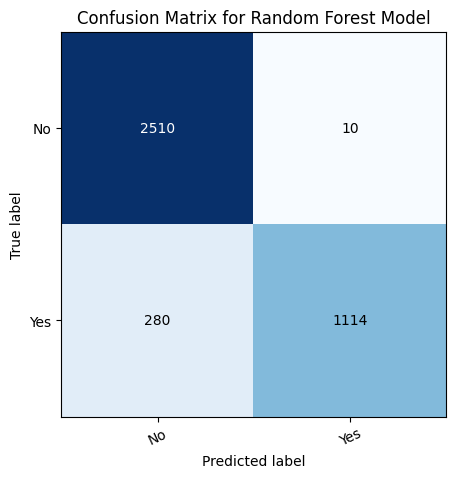

In [22]:
#Confusion Matrix for Drinking Purpose
matrix = confusion_matrix(y1_test,rf5_pre)
class_names=['No','Yes']
fig,ax=plot_confusion_matrix(conf_mat=matrix,figsize=(5,5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [23]:
# Performance Metrics for Drinking Purpose
def find_TP(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'Yes')) # True Positives
def find_FN(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'No')) # False Negatives Type-II error
def find_FP(y, y_hat):
   return sum((y == 'No') & (y_hat == 'Yes')) # False Positives Type-I error
def find_TN(y, y_hat):
   return sum((y == 'No') & (y_hat == 'No')) # True Negatives
TP=(find_TP(y1_test,rf5_pre))
TN=(find_TN(y1_test,rf5_pre))
FN=(find_FN(y1_test,rf5_pre))
FP=(find_FP(y1_test,rf5_pre))
print('True Positive:',TP)
print('True Negative:',TN)
print('False Positive:',FP)
print('False Negative:',FN)
accuracy=(TP+TN)/(TP+FP+TN+FN)
print('Accuracy:',accuracy)
if TP==0:
  precision=0
  recall=0
  f1_score=0
else:
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  f1_score = 2*((precision*recall)/(precision+recall))
print('Precision:',precision)
print('Recall:',recall)
print('F1 score:',f1_score)
if TN==0:
  specificity=0
else:
  specificity=TN/(TN+FP)
print('Specificity:',specificity)

True Positive: 1114
True Negative: 2510
False Positive: 10
False Negative: 280
Accuracy: 0.9259070005109862
Precision: 0.9911032028469751
Recall: 0.7991391678622669
F1 score: 0.8848292295472597
Specificity: 0.996031746031746


In [24]:
#Ailments
#Fitting the model
rf6=classifier_RF.fit(X_train, y2_train)
rf6_pre=rf6.predict(X_test)
acc6=accuracy_score(y2_test, rf6_pre) # Accuracy
print(acc6)
acc6=acc6*100

0.9200306591722024


In [25]:
#Cement Industry Purpose
#Fitting the model
rf7=classifier_RF.fit(X_train, y3_train)
rf7_pre=rf7.predict(X_test)
acc7=accuracy_score(y3_test,rf7_pre) # Accuracy
print(acc7)
acc7=acc7*100

0.9241185487991824


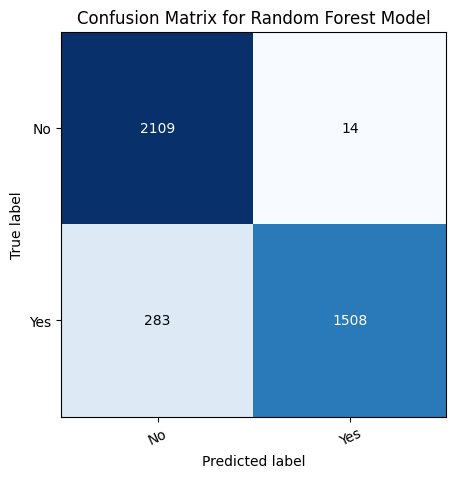

In [26]:
#Confusion Matrix for Cement Industry Purpose
matrix = confusion_matrix(y3_test,rf7_pre)
class_names=['No','Yes']
fig,ax=plot_confusion_matrix(conf_mat=matrix,figsize=(5,5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [27]:
# Performance Metrics for Cement Industry Purpose
def find_TP(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'Yes')) # True Positives
def find_FN(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'No')) # False Negatives Type-II error
def find_FP(y, y_hat):
   return sum((y == 'No') & (y_hat == 'Yes')) # False Positives Type-I error
def find_TN(y, y_hat):
   return sum((y == 'No') & (y_hat == 'No')) # True Negatives
TP=(find_TP(y3_test,rf7_pre))
TN=(find_TN(y3_test,rf7_pre))
FN=(find_FN(y3_test,rf7_pre))
FP=(find_FP(y3_test,rf7_pre))
print('True Positive:',TP)
print('True Negative:',TN)
print('False Positive:',FP)
print('False Negative:',FN)
accuracy=(TP+TN)/(TP+FP+TN+FN)
print('Accuracy:',accuracy)
if TP==0:
  precision=0
  recall=0
  f1_score=0
else:
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  f1_score = 2*((precision*recall)/(precision+recall))
print('Precision:',precision)
print('Recall:',recall)
print('F1 score:',f1_score)
if TN==0:
  specificity=0
else:
  specificity=TN/(TN+FP)
print('Specificity:',specificity)

True Positive: 1508
True Negative: 2109
False Positive: 14
False Negative: 283
Accuracy: 0.9241185487991824
Precision: 0.9908015768725361
Recall: 0.8419877163595757
F1 score: 0.9103531542408693
Specificity: 0.9934055581723975


In [28]:
#Irrigation Purpose
#Fitting the model
rf8=classifier_RF.fit(X_train, y4_train)
rf8_pre=rf8.predict(X_test)
acc8=accuracy_score(y4_test,rf8_pre) # Accuracy
print(acc8)
acc8*=100

0.9253960143076136


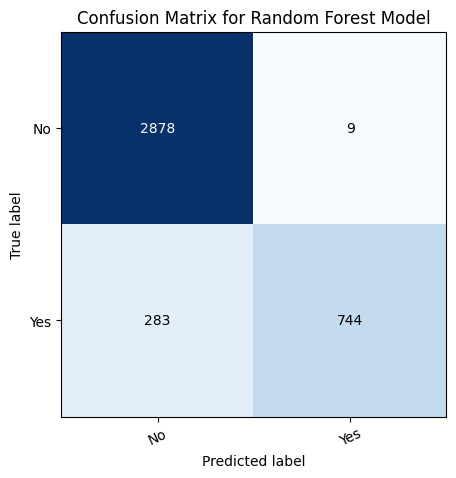

In [29]:
#Confusion Matrix for Irrigation Purpose
matrix = confusion_matrix(y4_test,rf8_pre)
class_names=['No','Yes']
fig,ax=plot_confusion_matrix(conf_mat=matrix,figsize=(5,5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [30]:
# Performance Metrics for Irrigation Purpose
def find_TP(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'Yes')) # True Positives
def find_FN(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'No')) # False Negatives Type-II error
def find_FP(y, y_hat):
   return sum((y == 'No') & (y_hat == 'Yes')) # False Positives Type-I error
def find_TN(y, y_hat):
   return sum((y == 'No') & (y_hat == 'No')) # True Negatives
TP=(find_TP(y4_test,rf8_pre))
TN=(find_TN(y4_test,rf8_pre))
FN=(find_FN(y4_test,rf8_pre))
FP=(find_FP(y4_test,rf8_pre))
print('True Positive:',TP)
print('True Negative:',TN)
print('False Positive:',FP)
print('False Negative:',FN)
accuracy=(TP+TN)/(TP+FP+TN+FN)
print('Accuracy:',accuracy)
if TP==0:
  precision=0
  recall=0
  f1_score=0
else:
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  f1_score = 2*((precision*recall)/(precision+recall))
print('Precision:',precision)
print('Recall:',recall)
print('F1 score:',f1_score)
if TN==0:
  specificity=0
else:
  specificity=TN/(TN+FP)
print('Specificity:',specificity)

True Positive: 744
True Negative: 2878
False Positive: 9
False Negative: 283
Accuracy: 0.9253960143076136
Precision: 0.9880478087649402
Recall: 0.7244401168451802
F1 score: 0.8359550561797754
Specificity: 0.9968825770696225


#### Prediction

In [32]:
ph=round(float(input()),2)
Ca=round(float(input()),2)
Mg=round(float(input()),2)
Cl=round(float(input()),2)
Ben=round(float(input()),2)
THM=round(float(input()),2)
Cu=round(float(input()),2)
Ni=round(float(input()),2)
Xtest1=[[ph,Ca,Mg,Cl,Ben,THM,Cu,Ni]]
X_test1=pd.DataFrame(Xtest1)
X_test1.rename(columns = {0: 'Ph',1:'Calcium(in ppm)',2:'Magnesium(in ppm)',3:'Chlorine(in ppm)',4:'Benzene(in ppb)',5:'THM(in ppb)',6:'Copper(in ppm)',7:'Nitrate(in ppm)',9:'Drinking Purpose',10:'Ailments',11:'Cement Industry Purpose',12:'Irrigation Purpose'}, inplace = True)
X_test1

25
45
85
78
14
75
96
35


,Ph,Calcium(in ppm),Magnesium(in ppm),Chlorine(in ppm),Benzene(in ppb),THM(in ppb),Copper(in ppm),Nitrate(in ppm)
0,25.0,45.0,85.0,78.0,14.0,75.0,96.0,35.0


In [33]:
rf=classifier_RF.fit(X, y5)
rf_pre=rf.predict(X_test1)
for i in rf_pre:
  print('Drinking Purpose: '+i[0])
  print('Ailments: '+i[1])
  print('Cement Industry Purpose: '+i[2])
  print('Irrigation Purpose: '+i[3])

Drinking Purpose: No
Ailments: Anaemia,Nausea,Bladder Cancer,Methemoglobinemia,Diarrhoea,Leukaemia
Cement Industry Purpose: No
Irrigation Purpose: No


### KNN (K-Nearest Neighbour)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn= KNeighborsClassifier(n_neighbors=10)

#### Fitting the model and Predcting the Accuracies

In [35]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

In [36]:
#Four features-Drinking Purpose,Ailments,Cement Industry Purpose,Irrigation Purpose
knn1=classifier_knn.fit(X_train, y5_train) # for fitting the dataset
knn1_pre=knn1.predict(X_test) # predicts the outputs for test input

In [37]:
#Accuracy for four features
pre1=pd.DataFrame(knn1_pre, columns=['Drinking Purpose','Ailments','Cement Industry Purpose','Irrigation Purpose'])
pre1['ail']=pre1['Drinking Purpose']+pre1['Ailments']+pre1['Cement Industry Purpose']+pre1['Irrigation Purpose']
pre2=pre1.drop(columns=['Drinking Purpose','Ailments','Cement Industry Purpose','Irrigation Purpose'])
pre1.drop(columns=['ail'],inplace=True)
f=0
ans=0
for i in y6_test['ail']:
  for j in range(len(pre2['ail'])):
    if f==j and pre2['ail'][j]==i:
      ans+=1
    elif j>f:
      break
  f+=1
acc9=(ans/f)*100
print(ans/f)

0.5797138477261113


In [38]:
# Four features Concatenating into one and training the model -Drinking Purpose+Ailments+Cement Industry Purpose+Irrigation Purpose
knn2=classifier_knn.fit(X_train,y6_train)
knn2_pre=knn2.predict(X_test)
acc10=accuracy_score(y6_test,knn2_pre) # Accuracy
print(acc10)
acc10*=100

0.5850792028615227


In [39]:
# Two features-Drinking Purpose,Ailments
knn3=classifier_knn.fit(X_train, y5_train1) # for fitting the dataset
knn3_pre=knn3.predict(X_test) # predicts the outputs for test input

In [40]:
#Accuracy for Two features
pre1=pd.DataFrame(knn3_pre, columns=['Drinking Purpose','Ailments'])
pre1['ail']=pre1['Drinking Purpose']+pre1['Ailments']
pre2=pre1.drop(columns=['Drinking Purpose','Ailments'])
pre1.drop(columns=['ail'],inplace=True)
f=0
ans=0
for i in y_test['ail']:
  for j in range(len(pre2['ail'])):
    if f==j and pre2['ail'][j]==i:
      ans+=1
    elif j>f:
      break
  f+=1
acc11=(ans/f)*100
print(ans/f)

0.6619826264690853


In [41]:
# Two features Concatenating into one and training the model -Drinking Purpose+Ailments
knn4=classifier_knn.fit(X_train,y_train)
knn4_pre=knn4.predict(X_test)
acc12=accuracy_score(y_test,knn4_pre) #Accuracy
print(acc12)
acc12*=100

0.6681144609095554


In [42]:
#Drinking Purpose
#Training the model
knn5=classifier_knn.fit(X_train, y1_train)
knn5_pre=knn5.predict(X_test)
acc13=accuracy_score(y1_test,knn5_pre) #Accuracy
print(acc13)
acc13*=100

0.9259070005109862


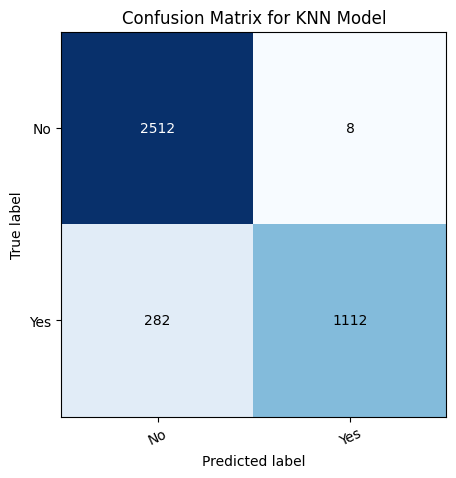

In [43]:
#Confusion Matrix for Drinking Purpose
matrix = confusion_matrix(y1_test,knn5_pre)
class_names=['No','Yes']
fig,ax=plot_confusion_matrix(conf_mat=matrix,figsize=(5,5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for KNN Model')
plt.show()

In [44]:
# Performance Metrics for Drinking Purpose
def find_TP(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'Yes')) # True Positives
def find_FN(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'No')) # False Negatives Type-II error
def find_FP(y, y_hat):
   return sum((y == 'No') & (y_hat == 'Yes')) # False Positives Type-I error
def find_TN(y, y_hat):
   return sum((y == 'No') & (y_hat == 'No')) # True Negatives
TP=(find_TP(y1_test,knn5_pre))
TN=(find_TN(y1_test,knn5_pre))
FN=(find_FN(y1_test,knn5_pre))
FP=(find_FP(y1_test,knn5_pre))
print('True Positive:',TP)
print('True Negative:',TN)
print('False Positive:',FP)
print('False Negative:',FN)
accuracy=(TP+TN)/(TP+FP+TN+FN)
print('Accuracy:',accuracy)
if TP==0:
  precision=0
  recall=0
  f1_score=0
else:
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  f1_score = 2*((precision*recall)/(precision+recall))
print('Precision:',precision)
print('Recall:',recall)
print('F1 score:',f1_score)
if TN==0:
  specificity=0
else:
  specificity=TN/(TN+FP)
print('Specificity:',specificity)

True Positive: 1112
True Negative: 2512
False Positive: 8
False Negative: 282
Accuracy: 0.9259070005109862
Precision: 0.9928571428571429
Recall: 0.7977044476327116
F1 score: 0.8846459824980111
Specificity: 0.9968253968253968


In [45]:
#Ailments
#Fitting the model
knn6=classifier_knn.fit(X_train, y2_train)
knn6_pre=knn6.predict(X_test)
acc14=accuracy_score(y2_test, knn6_pre) # Accuracy
print(acc14)
acc14*=100

0.6681144609095554


In [46]:
#Cement Industry Purpose
#Fitting the model
knn7=classifier_knn.fit(X_train, y3_train)
knn7_pre=knn7.predict(X_test)
acc15=accuracy_score(y3_test,knn7_pre) # Accuracy
print(acc15)
acc15*=100

0.8339294839039346


In [ ]:
#Confusion Matrix for Cement Industry Purpose
matrix = confusion_matrix(y3_test,knn7_pre)
class_names=['No','Yes']
fig,ax=plot_confusion_matrix(conf_mat=matrix,figsize=(5,5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for KNN Model')
plt.show()

In [47]:
# Performance Metrics for Cement Industry Purpose
def find_TP(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'Yes')) # True Positives
def find_FN(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'No')) # False Negatives Type-II error
def find_FP(y, y_hat):
   return sum((y == 'No') & (y_hat == 'Yes')) # False Positives Type-I error
def find_TN(y, y_hat):
   return sum((y == 'No') & (y_hat == 'No')) # True Negatives
TP=(find_TP(y3_test,knn7_pre))
TN=(find_TN(y3_test,knn7_pre))
FN=(find_FN(y3_test,knn7_pre))
FP=(find_FP(y3_test,knn7_pre))
print('True Positive:',TP)
print('True Negative:',TN)
print('False Positive:',FP)
print('False Negative:',FN)
accuracy=(TP+TN)/(TP+FP+TN+FN)
print('Accuracy:',accuracy)
if TP==0:
  precision=0
  recall=0
  f1_score=0
else:
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  f1_score = 2*((precision*recall)/(precision+recall))
print('Precision:',precision)
print('Recall:',recall)
print('F1 score:',f1_score)
if TN==0:
  specificity=0
else:
  specificity=TN/(TN+FP)
print('Specificity:',specificity)

True Positive: 1468
True Negative: 1796
False Positive: 327
False Negative: 323
Accuracy: 0.8339294839039346
Precision: 0.8178272980501393
Recall: 0.8196538246789503
F1 score: 0.8187395426659231
Specificity: 0.8459726801695714


In [48]:
#Irrigation Purpose
#Fitting the model
knn8=classifier_knn.fit(X_train, y4_train)
knn8_pre=knn8.predict(X_test)
acc16=accuracy_score(y4_test,knn8_pre) # Accuracy
print(acc16)
acc16*=100

0.9238630556974962


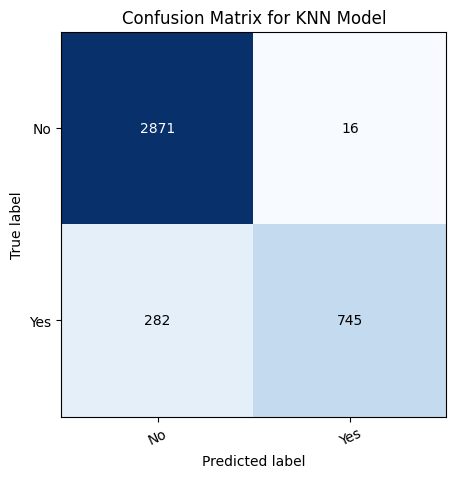

In [49]:
#Confusion Matrix for Irrigation Purpose
matrix = confusion_matrix(y4_test,knn8_pre)
class_names=['No','Yes']
fig,ax=plot_confusion_matrix(conf_mat=matrix,figsize=(5,5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for KNN Model')
plt.show()

In [50]:
# Performance Metrics for Irrigation Purpose
def find_TP(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'Yes')) # True Positives
def find_FN(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'No')) # False Negatives Type-II error
def find_FP(y, y_hat):
   return sum((y == 'No') & (y_hat == 'Yes')) # False Positives Type-I error
def find_TN(y, y_hat):
   return sum((y == 'No') & (y_hat == 'No')) # True Negatives
TP=(find_TP(y4_test,knn8_pre))
TN=(find_TN(y4_test,knn8_pre))
FN=(find_FN(y4_test,knn8_pre))
FP=(find_FP(y4_test,knn8_pre))
print('True Positive:',TP)
print('True Negative:',TN)
print('False Positive:',FP)
print('False Negative:',FN)
accuracy=(TP+TN)/(TP+FP+TN+FN)
print('Accuracy:',accuracy)
if TP==0:
  precision=0
  recall=0
  f1_score=0
else:
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  f1_score = 2*((precision*recall)/(precision+recall))
print('Precision:',precision)
print('Recall:',recall)
print('F1 score:',f1_score)
if TN==0:
  specificity=0
else:
  specificity=TN/(TN+FP)
print('Specificity:',specificity)

True Positive: 745
True Negative: 2871
False Positive: 16
False Negative: 282
Accuracy: 0.9238630556974962
Precision: 0.9789750328515112
Recall: 0.7254138266796495
F1 score: 0.8333333333333334
Specificity: 0.9944579147904399


#### Prediction

In [51]:
'''ph=round(float(input()),2)
Ca=round(float(input()),2)
Mg=round(float(input()),2)
Cl=round(float(input()),2)
Ben=round(float(input()),2)
THM=round(float(input()),2)
Cu=round(float(input()),2)
Ni=round(float(input()),2)
Xtest1=[[ph,Ca,Mg,Cl,Ben,THM,Cu,Ni]]
X_test1=pd.DataFrame(Xtest1)
X_test1.rename(columns = {0: 'Ph',1:'Calcium(in ppm)',2:'Magnesium(in ppm)',3:'Chlorine(in ppm)',4:'Benzene(in ppb)',5:'THM(in ppb)',6:'Copper(in ppm)',7:'Nitrate(in ppm)',9:'Drinking Purpose',10:'Ailments',11:'Cement Industry Purpose',12:'Irrigation Purpose'}, inplace = True)
X_test1'''

"ph=round(float(input()),2)\nCa=round(float(input()),2)\nMg=round(float(input()),2)\nCl=round(float(input()),2)\nBen=round(float(input()),2)\nTHM=round(float(input()),2)\nCu=round(float(input()),2)\nNi=round(float(input()),2)\nXtest1=[[ph,Ca,Mg,Cl,Ben,THM,Cu,Ni]]\nX_test1=pd.DataFrame(Xtest1)\nX_test1.rename(columns = {0: 'Ph',1:'Calcium(in ppm)',2:'Magnesium(in ppm)',3:'Chlorine(in ppm)',4:'Benzene(in ppb)',5:'THM(in ppb)',6:'Copper(in ppm)',7:'Nitrate(in ppm)',9:'Drinking Purpose',10:'Ailments',11:'Cement Industry Purpose',12:'Irrigation Purpose'}, inplace = True)\nX_test1"

In [52]:
knn=classifier_knn.fit(X, y5)
knn_pre=knn.predict(X_test1)
for i in knn_pre:
  print('Drinking Purpose: '+i[0])
  print('Ailments: '+i[1])
  print('Cement Industry Purpose: '+i[2])
  print('Irrigation Purpose: '+i[3])

Drinking Purpose: No
Ailments: Anaemia,Nausea,Bladder Cancer,Methemoglobinemia,Diarrhoea,Leukaemia
Cement Industry Purpose: Yes
Irrigation Purpose: No


### Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
classifier_dtree=DecisionTreeClassifier()

#### Fitting the model and Predcting the Accuracies

In [55]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

In [56]:
#Four features-Drinking Purpose,Ailments,Cement Industry Purpose,Irrigation Purpose
dtree1=classifier_dtree.fit(X_train, y5_train) # for fitting the dataset
dtree1_pre=dtree1.predict(X_test) # predicts the outputs for test input

In [57]:
#Accuracy for four features
pre1=pd.DataFrame(dtree1_pre, columns=['Drinking Purpose','Ailments','Cement Industry Purpose','Irrigation Purpose'])
pre1['ail']=pre1['Drinking Purpose']+pre1['Ailments']+pre1['Cement Industry Purpose']+pre1['Irrigation Purpose']
pre2=pre1.drop(columns=['Drinking Purpose','Ailments','Cement Industry Purpose','Irrigation Purpose'])
pre1.drop(columns=['ail'],inplace=True)
f=0
ans=0
for i in y6_test['ail']:
  for j in range(len(pre2['ail'])):
    if f==j and pre2['ail'][j]==i:
      ans+=1
    elif j>f:
      break
  f+=1
acc17=(ans/f)*100
print(ans/f)

0.8707204905467553


In [58]:
# Four features Concatenating into one and training the model -Drinking Purpose+Ailments+Cement Industry Purpose+Irrigation Purpose
dtree2=classifier_dtree.fit(X_train,y6_train)
dtree2_pre=dtree2.predict(X_test)
acc18=accuracy_score(y6_test,dtree2_pre) # Accuracy
print(acc18)
acc18*=100

0.8781297904956566


In [59]:
# Two features-Drinking Purpose,Ailments
dtree3=classifier_dtree.fit(X_train, y5_train1) # for fitting the dataset
dtree3_pre=dtree3.predict(X_test) # predicts the outputs for test input

In [60]:
#Accuracy for Two features
pre1=pd.DataFrame(dtree3_pre, columns=['Drinking Purpose','Ailments'])
pre1['ail']=pre1['Drinking Purpose']+pre1['Ailments']
pre2=pre1.drop(columns=['Drinking Purpose','Ailments'])
pre1.drop(columns=['ail'],inplace=True)
f=0
ans=0
for i in y_test['ail']:
  for j in range(len(pre2['ail'])):
    if f==j and pre2['ail'][j]==i:
      ans+=1
    elif j>f:
      break
  f+=1
acc19=(ans/f)*100
print(ans/f)

0.8771078180889116


In [61]:
# Two features Concatenating into one and training the model -Drinking Purpose+Ailments
dtree4=classifier_dtree.fit(X_train,y_train)
dtree4_pre=dtree4.predict(X_test)
acc20=accuracy_score(y_test,dtree4_pre) #Accuracy
print(acc20)
acc20*=100

0.8783852835973429


In [62]:
#Drinking Purpose
#Training the model
dtree5=classifier_dtree.fit(X_train, y1_train)
dtree5_pre=dtree5.predict(X_test)
acc21=accuracy_score(y1_test,dtree5_pre) #Accuracy
print(acc21)
acc21*=100

0.872508942258559


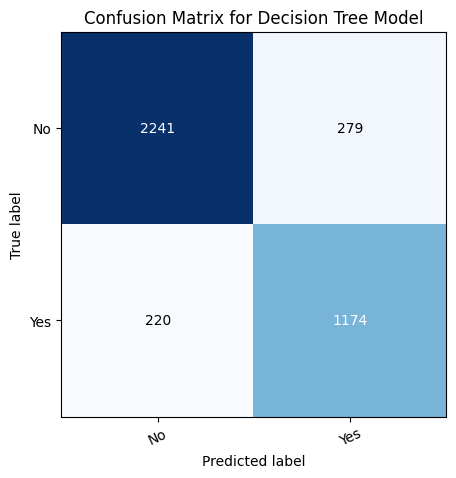

In [63]:
#Confusion Matrix for Drinking Purpose
matrix = confusion_matrix(y1_test,dtree5_pre)
class_names=['No','Yes']
fig,ax=plot_confusion_matrix(conf_mat=matrix,figsize=(5,5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

In [64]:
# Performance Metrics for Drinking Purpose
def find_TP(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'Yes')) # True Positives
def find_FN(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'No')) # False Negatives Type-II error
def find_FP(y, y_hat):
   return sum((y == 'No') & (y_hat == 'Yes')) # False Positives Type-I error
def find_TN(y, y_hat):
   return sum((y == 'No') & (y_hat == 'No')) # True Negatives
TP=(find_TP(y1_test,dtree5_pre))
TN=(find_TN(y1_test,dtree5_pre))
FN=(find_FN(y1_test,dtree5_pre))
FP=(find_FP(y1_test,dtree5_pre))
print('True Positive:',TP)
print('True Negative:',TN)
print('False Positive:',FP)
print('False Negative:',FN)
accuracy=(TP+TN)/(TP+FP+TN+FN)
print('Accuracy:',accuracy)
if TP==0:
  precision=0
  recall=0
  f1_score=0
else:
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  f1_score = 2*((precision*recall)/(precision+recall))
print('Precision:',precision)
print('Recall:',recall)
print('F1 score:',f1_score)
if TN==0:
  specificity=0
else:
  specificity=TN/(TN+FP)
print('Specificity:',specificity)

True Positive: 1174
True Negative: 2241
False Positive: 279
False Negative: 220
Accuracy: 0.872508942258559
Precision: 0.8079834824501032
Recall: 0.8421807747489239
F1 score: 0.8247277836318931
Specificity: 0.8892857142857142


In [65]:
#Ailments
#Fitting the model
dtree6=classifier_dtree.fit(X_train, y2_train)
dtree6_pre=dtree6.predict(X_test)
acc22=accuracy_score(y2_test, dtree6_pre) # Accuracy
print(acc22)
acc22*=100

0.8806847215125192


In [66]:
#Cement Industry Purpose
#Fitting the model
dtree7=classifier_dtree.fit(X_train, y3_train)
dtree7_pre=dtree7.predict(X_test)
acc23=accuracy_score(y3_test,dtree7_pre) # Accuracy
print(acc23)
acc23*=100

0.874552887072049


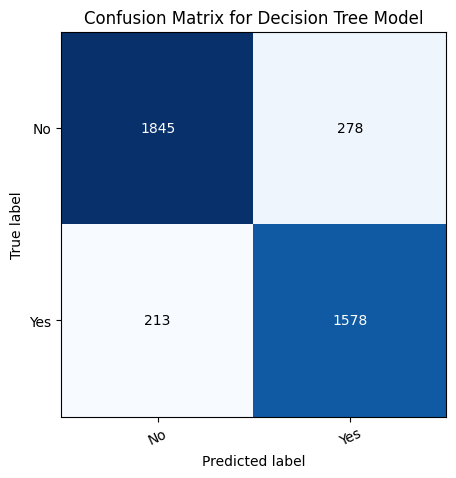

In [67]:
#Confusion Matrix for Cement Industry Purpose
matrix = confusion_matrix(y3_test,dtree7_pre)
class_names=['No','Yes']
fig,ax=plot_confusion_matrix(conf_mat=matrix,figsize=(5,5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

In [68]:
# Performance Metrics for Cement Industry Purpose
def find_TP(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'Yes')) # True Positives
def find_FN(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'No')) # False Negatives Type-II error
def find_FP(y, y_hat):
   return sum((y == 'No') & (y_hat == 'Yes')) # False Positives Type-I error
def find_TN(y, y_hat):
   return sum((y == 'No') & (y_hat == 'No')) # True Negatives
TP=(find_TP(y3_test,dtree7_pre))
TN=(find_TN(y3_test,dtree7_pre))
FN=(find_FN(y3_test,dtree7_pre))
FP=(find_FP(y3_test,dtree7_pre))
print('True Positive:',TP)
print('True Negative:',TN)
print('False Positive:',FP)
print('False Negative:',FN)
accuracy=(TP+TN)/(TP+FP+TN+FN)
print('Accuracy:',accuracy)
if TP==0:
  precision=0
  recall=0
  f1_score=0
else:
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  f1_score = 2*((precision*recall)/(precision+recall))
print('Precision:',precision)
print('Recall:',recall)
print('F1 score:',f1_score)
if TN==0:
  specificity=0
else:
  specificity=TN/(TN+FP)
print('Specificity:',specificity)

True Positive: 1578
True Negative: 1845
False Positive: 278
False Negative: 213
Accuracy: 0.874552887072049
Precision: 0.8502155172413793
Recall: 0.88107202680067
F1 score: 0.8653687962709077
Specificity: 0.8690532265661799


In [69]:
#Irrigation Purpose
#Fitting the model
dtree8=classifier_dtree.fit(X_train, y4_train)
dtree8_pre=dtree8.predict(X_test)
acc24=accuracy_score(y4_test,dtree8_pre) # Accuracy
print(acc24)
acc24*=100

0.8676545733265202


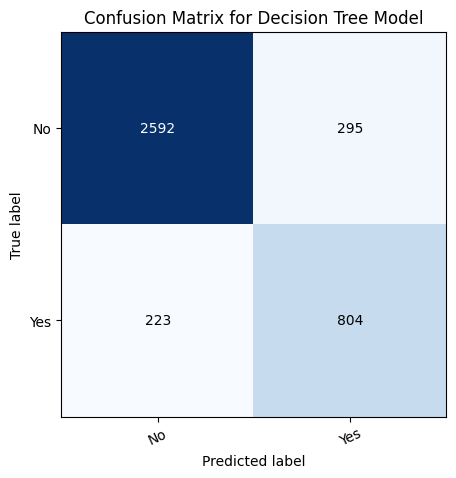

In [70]:
#Confusion Matrix for Irrigation Purpose
matrix = confusion_matrix(y4_test,dtree8_pre)
class_names=['No','Yes']
fig,ax=plot_confusion_matrix(conf_mat=matrix,figsize=(5,5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

In [71]:
# Performance Metrics for Irrigation Purpose
def find_TP(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'Yes')) # True Positives
def find_FN(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'No')) # False Negatives Type-II error
def find_FP(y, y_hat):
   return sum((y == 'No') & (y_hat == 'Yes')) # False Positives Type-I error
def find_TN(y, y_hat):
   return sum((y == 'No') & (y_hat == 'No')) # True Negatives
TP=(find_TP(y4_test,dtree8_pre))
TN=(find_TN(y4_test,dtree8_pre))
FN=(find_FN(y4_test,dtree8_pre))
FP=(find_FP(y4_test,dtree8_pre))
print('True Positive:',TP)
print('True Negative:',TN)
print('False Positive:',FP)
print('False Negative:',FN)
accuracy=(TP+TN)/(TP+FP+TN+FN)
print('Accuracy:',accuracy)
if TP==0:
  precision=0
  recall=0
  f1_score=0
else:
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  f1_score = 2*((precision*recall)/(precision+recall))
print('Precision:',precision)
print('Recall:',recall)
print('F1 score:',f1_score)
if TN==0:
  specificity=0
else:
  specificity=TN/(TN+FP)
print('Specificity:',specificity)

True Positive: 804
True Negative: 2592
False Positive: 295
False Negative: 223
Accuracy: 0.8676545733265202
Precision: 0.7315741583257507
Recall: 0.7828627069133398
F1 score: 0.7563499529633113
Specificity: 0.8978178039487357


#### Prediction

In [72]:
'''ph=round(float(input()),2)
Ca=round(float(input()),2)
Mg=round(float(input()),2)
Cl=round(float(input()),2)
Ben=round(float(input()),2)
THM=round(float(input()),2)
Cu=round(float(input()),2)
Ni=round(float(input()),2)
Xtest1=[[ph,Ca,Mg,Cl,Ben,THM,Cu,Ni]]
X_test1=pd.DataFrame(Xtest1)
X_test1.rename(columns = {0: 'Ph',1:'Calcium(in ppm)',2:'Magnesium(in ppm)',3:'Chlorine(in ppm)',4:'Benzene(in ppb)',5:'THM(in ppb)',6:'Copper(in ppm)',7:'Nitrate(in ppm)',9:'Drinking Purpose',10:'Ailments',11:'Cement Industry Purpose',12:'Irrigation Purpose'}, inplace = True)
X_test1'''

"ph=round(float(input()),2)\nCa=round(float(input()),2)\nMg=round(float(input()),2)\nCl=round(float(input()),2)\nBen=round(float(input()),2)\nTHM=round(float(input()),2)\nCu=round(float(input()),2)\nNi=round(float(input()),2)\nXtest1=[[ph,Ca,Mg,Cl,Ben,THM,Cu,Ni]]\nX_test1=pd.DataFrame(Xtest1)\nX_test1.rename(columns = {0: 'Ph',1:'Calcium(in ppm)',2:'Magnesium(in ppm)',3:'Chlorine(in ppm)',4:'Benzene(in ppb)',5:'THM(in ppb)',6:'Copper(in ppm)',7:'Nitrate(in ppm)',9:'Drinking Purpose',10:'Ailments',11:'Cement Industry Purpose',12:'Irrigation Purpose'}, inplace = True)\nX_test1"

In [73]:
dtree=classifier_dtree.fit(X, y5)
dtree_pre=dtree.predict(X_test1)
for i in dtree_pre:
  print('Drinking Purpose: '+i[0])
  print('Ailments: '+i[1])
  print('Cement Industry Purpose: '+i[2])
  print('Irrigation Purpose: '+i[3])

Drinking Purpose: Yes
Ailments: Safe
Cement Industry Purpose: Yes
Irrigation Purpose: Yes


### SVM (Support Vector Machine) rbf

In [74]:
from sklearn.svm import SVC
classifier_svmrbf = SVC(kernel='rbf')

In [75]:
 # for ignoring warnings
import warnings
warnings.filterwarnings("ignore")

#### Fitting the model and Predcting the Accuracies

In [76]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

In [77]:
# Four features Concatenating into one and training the model -Drinking Purpose+Ailments+Cement Industry Purpose+Irrigation Purpose
svmrbf2=classifier_svmrbf.fit(X_train,y6_train)
svmrbf2_pre=svmrbf2.predict(X_test)
acc26=accuracy_score(y6_test,svmrbf2_pre) # Accuracy
print(acc26)
acc26*=100

0.6280020439448135


In [78]:
# Two features Concatenating into one and training the model -Drinking Purpose+Ailments
svmrbf4=classifier_svmrbf.fit(X_train,y_train)
svmrbf4_pre=svmrbf4.predict(X_test)
acc28=accuracy_score(y_test,svmrbf4_pre) #Accuracy
print(acc28)
acc28*=100

0.7066939192641799


In [79]:
#Drinking Purpose
#Training the model
svmrbf5=classifier_svmrbf.fit(X_train, y1_train)
svmrbf5_pre=svmrbf5.predict(X_test)
acc29=accuracy_score(y1_test,svmrbf5_pre) #Accuracy
print(acc29)
acc29*=100

0.92769545222279


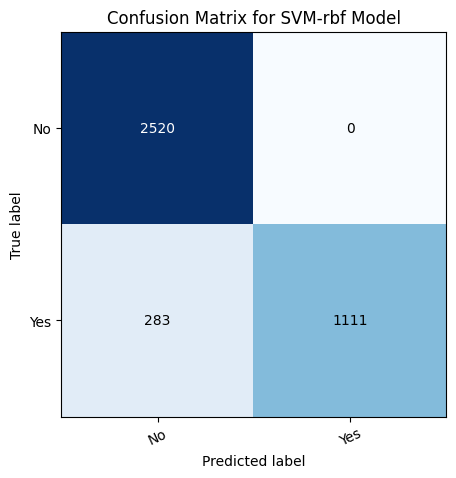

In [80]:
#Confusion Matrix for Drinking Purpose
matrix = confusion_matrix(y1_test,svmrbf5_pre)
class_names=['No','Yes']
fig,ax=plot_confusion_matrix(conf_mat=matrix,figsize=(5,5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for SVM-rbf Model')
plt.show()

In [81]:
# Performance Metrics for Drinking Purpose
def find_TP(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'Yes')) # True Positives
def find_FN(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'No')) # False Negatives Type-II error
def find_FP(y, y_hat):
   return sum((y == 'No') & (y_hat == 'Yes')) # False Positives Type-I error
def find_TN(y, y_hat):
   return sum((y == 'No') & (y_hat == 'No')) # True Negatives
TP=(find_TP(y1_test,svmrbf5_pre))
TN=(find_TN(y1_test,svmrbf5_pre))
FN=(find_FN(y1_test,svmrbf5_pre))
FP=(find_FP(y1_test,svmrbf5_pre))
print('True Positive:',TP)
print('True Negative:',TN)
print('False Positive:',FP)
print('False Negative:',FN)
accuracy=(TP+TN)/(TP+FP+TN+FN)
print('Accuracy:',accuracy)
if TP==0:
  precision=0
  recall=0
  f1_score=0
else:
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  f1_score = 2*((precision*recall)/(precision+recall))
print('Precision:',precision)
print('Recall:',recall)
print('F1 score:',f1_score)
if TN==0:
  specificity=0
else:
  specificity=TN/(TN+FP)
print('Specificity:',specificity)

True Positive: 1111
True Negative: 2520
False Positive: 0
False Negative: 283
Accuracy: 0.92769545222279
Precision: 1.0
Recall: 0.796987087517934
F1 score: 0.8870259481037924
Specificity: 1.0


In [82]:
#Ailments
#Fitting the model
svmrbf6=classifier_svmrbf.fit(X_train, y2_train)
svmrbf6_pre=svmrbf6.predict(X_test)
acc30=accuracy_score(y2_test, svmrbf6_pre) # Accuracy
print(acc30)
acc30*=100

0.7066939192641799


In [83]:
#Cement Industry Purpose
#Fitting the model
svmrbf7=classifier_svmrbf.fit(X_train, y3_train)
svmrbf7_pre=svmrbf7.predict(X_test)
acc31=accuracy_score(y3_test,svmrbf7_pre) # Accuracy
print(acc31)
acc31*=100

0.8449156872764435


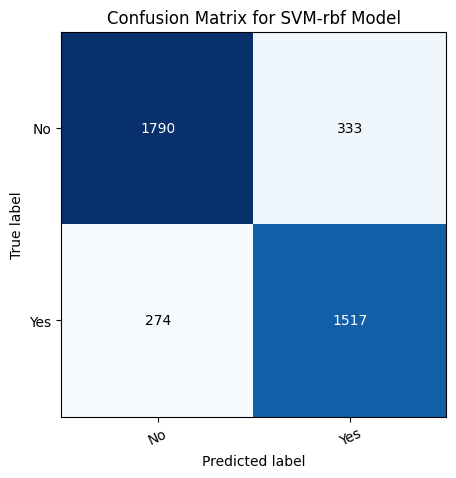

In [84]:
#Confusion Matrix for Cement Industry Purpose
matrix = confusion_matrix(y3_test,svmrbf7_pre)
class_names=['No','Yes']
fig,ax=plot_confusion_matrix(conf_mat=matrix,figsize=(5,5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for SVM-rbf Model')
plt.show()

In [85]:
# Performance Metrics for Cement Industry Purpose
def find_TP(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'Yes')) # True Positives
def find_FN(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'No')) # False Negatives Type-II error
def find_FP(y, y_hat):
   return sum((y == 'No') & (y_hat == 'Yes')) # False Positives Type-I error
def find_TN(y, y_hat):
   return sum((y == 'No') & (y_hat == 'No')) # True Negatives
TP=(find_TP(y3_test,svmrbf7_pre))
TN=(find_TN(y3_test,svmrbf7_pre))
FN=(find_FN(y3_test,svmrbf7_pre))
FP=(find_FP(y3_test,svmrbf7_pre))
print('True Positive:',TP)
print('True Negative:',TN)
print('False Positive:',FP)
print('False Negative:',FN)
accuracy=(TP+TN)/(TP+FP+TN+FN)
print('Accuracy:',accuracy)
if TP==0:
  precision=0
  recall=0
  f1_score=0
else:
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  f1_score = 2*((precision*recall)/(precision+recall))
print('Precision:',precision)
print('Recall:',recall)
print('F1 score:',f1_score)
if TN==0:
  specificity=0
else:
  specificity=TN/(TN+FP)
print('Specificity:',specificity)

True Positive: 1517
True Negative: 1790
False Positive: 333
False Negative: 274
Accuracy: 0.8449156872764435
Precision: 0.82
Recall: 0.8470128419877163
F1 score: 0.8332875583630871
Specificity: 0.8431464908148846


In [86]:
#Irrigation Purpose
#Fitting the model
svmrbf8=classifier_svmrbf.fit(X_train, y4_train)
svmrbf8_pre=svmrbf8.predict(X_test)
acc32=accuracy_score(y4_test,svmrbf8_pre) # Accuracy
print(acc32)
acc32*=100

0.926673479816045


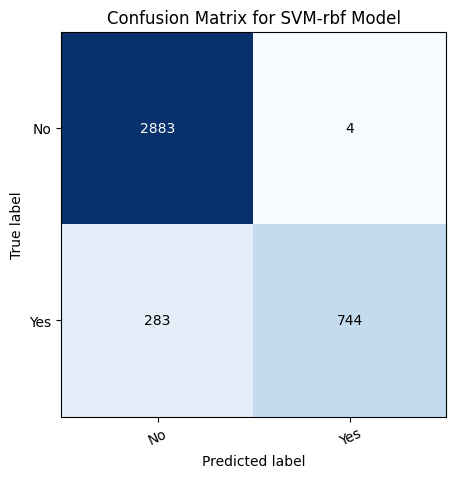

In [87]:
#Confusion Matrix for Irrigation Purpose
matrix = confusion_matrix(y4_test,svmrbf8_pre)
class_names=['No','Yes']
fig,ax=plot_confusion_matrix(conf_mat=matrix,figsize=(5,5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for SVM-rbf Model')
plt.show()

In [88]:
# Performance Metrics for Irrigation Purpose
def find_TP(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'Yes')) # True Positives
def find_FN(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'No')) # False Negatives Type-II error
def find_FP(y, y_hat):
   return sum((y == 'No') & (y_hat == 'Yes')) # False Positives Type-I error
def find_TN(y, y_hat):
   return sum((y == 'No') & (y_hat == 'No')) # True Negatives
TP=(find_TP(y4_test,svmrbf8_pre))
TN=(find_TN(y4_test,svmrbf8_pre))
FN=(find_FN(y4_test,svmrbf8_pre))
FP=(find_FP(y4_test,svmrbf8_pre))
print('True Positive:',TP)
print('True Negative:',TN)
print('False Positive:',FP)
print('False Negative:',FN)
accuracy=(TP+TN)/(TP+FP+TN+FN)
print('Accuracy:',accuracy)
if TP==0:
  precision=0
  recall=0
  f1_score=0
else:
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  f1_score = 2*((precision*recall)/(precision+recall))
print('Precision:',precision)
print('Recall:',recall)
print('F1 score:',f1_score)
if TN==0:
  specificity=0
else:
  specificity=TN/(TN+FP)
print('Specificity:',specificity)

True Positive: 744
True Negative: 2883
False Positive: 4
False Negative: 283
Accuracy: 0.926673479816045
Precision: 0.9946524064171123
Recall: 0.7244401168451802
F1 score: 0.8383098591549296
Specificity: 0.99861447869761


#### Prediction

In [89]:
'''ph=round(float(input()),2)
Ca=round(float(input()),2)
Mg=round(float(input()),2)
Cl=round(float(input()),2)
Ben=round(float(input()),2)
THM=round(float(input()),2)
Cu=round(float(input()),2)
Ni=round(float(input()),2)
Xtest1=[[ph,Ca,Mg,Cl,Ben,THM,Cu,Ni]]
X_test1=pd.DataFrame(Xtest1)
X_test1.rename(columns = {0: 'Ph',1:'Calcium(in ppm)',2:'Magnesium(in ppm)',3:'Chlorine(in ppm)',4:'Benzene(in ppb)',5:'THM(in ppb)',6:'Copper(in ppm)',7:'Nitrate(in ppm)',9:'Drinking Purpose',10:'Ailments',11:'Cement Industry Purpose',12:'Irrigation Purpose'}, inplace = True)
X_test1'''

"ph=round(float(input()),2)\nCa=round(float(input()),2)\nMg=round(float(input()),2)\nCl=round(float(input()),2)\nBen=round(float(input()),2)\nTHM=round(float(input()),2)\nCu=round(float(input()),2)\nNi=round(float(input()),2)\nXtest1=[[ph,Ca,Mg,Cl,Ben,THM,Cu,Ni]]\nX_test1=pd.DataFrame(Xtest1)\nX_test1.rename(columns = {0: 'Ph',1:'Calcium(in ppm)',2:'Magnesium(in ppm)',3:'Chlorine(in ppm)',4:'Benzene(in ppb)',5:'THM(in ppb)',6:'Copper(in ppm)',7:'Nitrate(in ppm)',9:'Drinking Purpose',10:'Ailments',11:'Cement Industry Purpose',12:'Irrigation Purpose'}, inplace = True)\nX_test1"

In [90]:
svmrbf5=classifier_svmrbf.fit(X_train, y1_train)
svmrbf_pre1=svmrbf5.predict(X_test1)
svmrbf6=classifier_svmrbf.fit(X_train, y2_train)
svmrbf_pre2=svmrbf6.predict(X_test1)
svmrbf7=classifier_svmrbf.fit(X_train, y3_train)
svmrbf_pre3=svmrbf7.predict(X_test1)
svmrbf8=classifier_svmrbf.fit(X_train, y4_train)
svmrbf_pre4=svmrbf8.predict(X_test1)
print('Drinking Purpose: '+svmrbf_pre1[0])
print('Ailments: '+svmrbf_pre2[0])
print('Cement Industry Purpose: '+svmrbf_pre3[0])
print('Irrigation Purpose: '+svmrbf_pre4[0])

Drinking Purpose: No
Ailments: Anaemia,Nausea,Bladder Cancer,Methemoglobinemia,Diarrhoea,Leukaemia
Cement Industry Purpose: Yes
Irrigation Purpose: No


### SVM (Support Vector Machine) poly

In [91]:
from sklearn.svm import SVC
classifier_svmpoly = SVC(kernel='poly')

In [92]:
 # for ignoring warnings
import warnings
warnings.filterwarnings("ignore")

#### Fitting the model and Predcting the Accuracies

In [93]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

In [94]:
# Four features Concatenating into one and training the model -Drinking Purpose+Ailments+Cement Industry Purpose+Irrigation Purpose
svmpoly2=classifier_svmpoly.fit(X_train,y6_train)
svmpoly2_pre=svmpoly2.predict(X_test)
acc34=accuracy_score(y6_test,svmpoly2_pre) # Accuracy
print(acc34)
acc34*=100

0.685743484925907


In [95]:
# Two features Concatenating into one and training the model -Drinking Purpose+Ailments
svmpoly4=classifier_svmpoly.fit(X_train,y_train)
svmpoly4_pre=svmpoly4.predict(X_test)
acc36=accuracy_score(y_test,svmpoly4_pre) #Accuracy
print(acc36)
acc36*=100

0.5881451200817578


In [96]:
#Drinking Purpose
#Training the model
svmpoly5=classifier_svmpoly.fit(X_train, y1_train)
svmpoly5_pre=svmpoly5.predict(X_test)
acc37=accuracy_score(y1_test,svmpoly5_pre) #Accuracy
print(acc37)
acc37*=100

0.6438426162493612


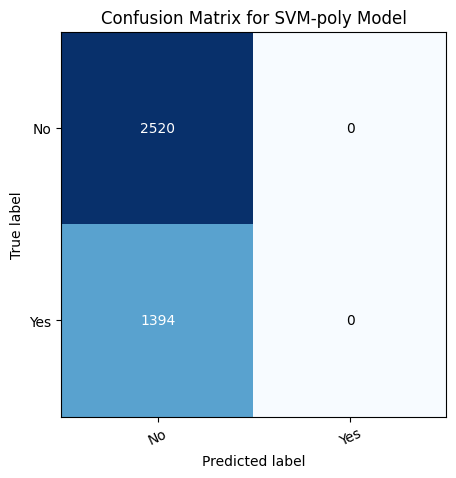

In [97]:
#Confusion Matrix for Drinking Purpose
matrix = confusion_matrix(y1_test,svmpoly5_pre)
class_names=['No','Yes']
fig,ax=plot_confusion_matrix(conf_mat=matrix,figsize=(5,5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for SVM-poly Model')
plt.show()

In [98]:
# Performance Metrics for Drinking Purpose
def find_TP(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'Yes')) # True Positives
def find_FN(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'No')) # False Negatives Type-II error
def find_FP(y, y_hat):
   return sum((y == 'No') & (y_hat == 'Yes')) # False Positives Type-I error
def find_TN(y, y_hat):
   return sum((y == 'No') & (y_hat == 'No')) # True Negatives
TP=(find_TP(y1_test,svmpoly5_pre))
TN=(find_TN(y1_test,svmpoly5_pre))
FN=(find_FN(y1_test,svmpoly5_pre))
FP=(find_FP(y1_test,svmpoly5_pre))
print('True Positive:',TP)
print('True Negative:',TN)
print('False Positive:',FP)
print('False Negative:',FN)
accuracy=(TP+TN)/(TP+FP+TN+FN)
print('Accuracy:',accuracy)
acc43=accuracy*100
if TP==0:
  precision=0
  recall=0
  f1_score=0
else:
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  f1_score = 2*((precision*recall)/(precision+recall))
print('Precision:',precision)
print('Recall:',recall)
print('F1 score:',f1_score)
if TN==0:
  specificity=0
else:
  specificity=TN/(TN+FP)
print('Specificity:',specificity)

True Positive: 0
True Negative: 2520
False Positive: 0
False Negative: 1394
Accuracy: 0.6438426162493612
Precision: 0
Recall: 0
F1 score: 0
Specificity: 1.0


In [99]:
#Ailments
#Fitting the model
svmpoly6=classifier_svmpoly.fit(X_train, y2_train)
svmpoly6_pre=svmpoly6.predict(X_test)
acc38=accuracy_score(y2_test, svmpoly6_pre) # Accuracy
print(acc38)
acc38*=100

0.5881451200817578


In [100]:
#Cement Industry Purpose
#Fitting the model
svmpoly7=classifier_svmpoly.fit(X_train, y3_train)
svmpoly7_pre=svmpoly7.predict(X_test)
acc39=accuracy_score(y3_test,svmpoly7_pre) # Accuracy
print(acc39)
acc39*=100

0.6389882473173224


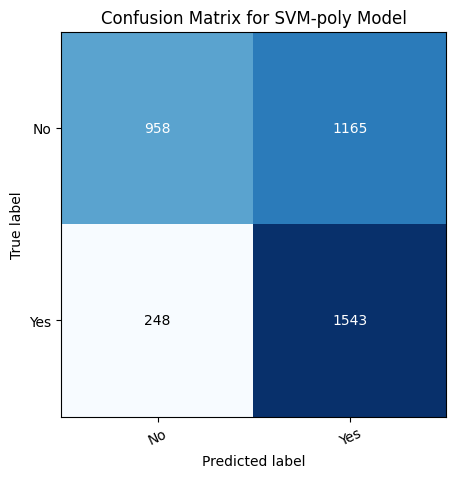

In [101]:
#Confusion Matrix for Cement Industry Purpose
matrix = confusion_matrix(y3_test,svmpoly7_pre)
class_names=['No','Yes']
fig,ax=plot_confusion_matrix(conf_mat=matrix,figsize=(5,5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for SVM-poly Model')
plt.show()

In [102]:
# Performance Metrics for Cement Industry Purpose
def find_TP(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'Yes')) # True Positives
def find_FN(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'No')) # False Negatives Type-II error
def find_FP(y, y_hat):
   return sum((y == 'No') & (y_hat == 'Yes')) # False Positives Type-I error
def find_TN(y, y_hat):
   return sum((y == 'No') & (y_hat == 'No')) # True Negatives
TP=(find_TP(y3_test,svmpoly7_pre))
TN=(find_TN(y3_test,svmpoly7_pre))
FN=(find_FN(y3_test,svmpoly7_pre))
FP=(find_FP(y3_test,svmpoly7_pre))
print('True Positive:',TP)
print('True Negative:',TN)
print('False Positive:',FP)
print('False Negative:',FN)
accuracy=(TP+TN)/(TP+FP+TN+FN)
print('Accuracy:',accuracy)
acc41=accuracy*100

if TP==0:
  precision=0
  recall=0
  f1_score=0
else:
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  f1_score = 2*((precision*recall)/(precision+recall))
print('Precision:',precision)
print('Recall:',recall)
print('F1 score:',f1_score)
if TN==0:
  specificity=0
else:
  specificity=TN/(TN+FP)
print('Specificity:',specificity)

True Positive: 1543
True Negative: 958
False Positive: 1165
False Negative: 248
Accuracy: 0.6389882473173224
Precision: 0.5697932053175776
Recall: 0.8615298715801228
F1 score: 0.6859302067126027
Specificity: 0.45124823363165334


In [103]:
#Irrigation Purpose
#Training the model
svmpoly8=classifier_svmpoly.fit(X_train, y4_train)
svmpoly8_pre=svmpoly8.predict(X_test)
acc40=accuracy_score(y4_test,svmpoly8_pre) # Accuracy
print(acc40)
acc40*=100

0.7376085845682167


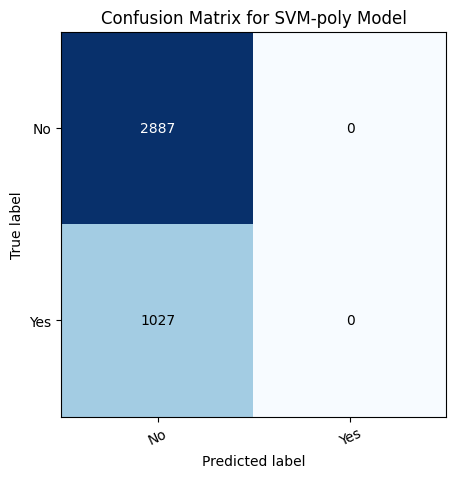

In [104]:
#Confusion Matrix for Irrigation Purpose
matrix = confusion_matrix(y4_test,svmpoly8_pre)
class_names=['No','Yes']
fig,ax=plot_confusion_matrix(conf_mat=matrix,figsize=(5,5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for SVM-poly Model')
plt.show()

In [105]:
# Performance Metrics for Irrigation Purpose
def find_TP(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'Yes')) # True Positives
def find_FN(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'No')) # False Negatives Type-II error
def find_FP(y, y_hat):
   return sum((y == 'No') & (y_hat == 'Yes')) # False Positives Type-I error
def find_TN(y, y_hat):
   return sum((y == 'No') & (y_hat == 'No')) # True Negatives
TP=(find_TP(y4_test,svmpoly8_pre))
TN=(find_TN(y4_test,svmpoly8_pre))
FN=(find_FN(y4_test,svmpoly8_pre))
FP=(find_FP(y4_test,svmpoly8_pre))
print('True Positive:',TP)
print('True Negative:',TN)
print('False Positive:',FP)
print('False Negative:',FN)
accuracy=(TP+TN)/(TP+FP+TN+FN)
print('Accuracy:',accuracy)
acc35=accuracy*100
if TP==0:
  precision=0
  recall=0
  f1_score=0
else:
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  f1_score = 2*((precision*recall)/(precision+recall))
print('Precision:',precision)
print('Recall:',recall)
print('F1 score:',f1_score)
if TN==0:
  specificity=0
else:
  specificity=TN/(TN+FP)
print('Specificity:',specificity)

True Positive: 0
True Negative: 2887
False Positive: 0
False Negative: 1027
Accuracy: 0.7376085845682167
Precision: 0
Recall: 0
F1 score: 0
Specificity: 1.0


#### Prediction

In [106]:
'''ph=round(float(input()),2)
Ca=round(float(input()),2)
Mg=round(float(input()),2)
Cl=round(float(input()),2)
Ben=round(float(input()),2)
THM=round(float(input()),2)
Cu=round(float(input()),2)
Ni=round(float(input()),2)
Xtest1=[[ph,Ca,Mg,Cl,Ben,THM,Cu,Ni]]
X_test1=pd.DataFrame(Xtest1)
X_test1.rename(columns = {0: 'Ph',1:'Calcium(in ppm)',2:'Magnesium(in ppm)',3:'Chlorine(in ppm)',4:'Benzene(in ppb)',5:'THM(in ppb)',6:'Copper(in ppm)',7:'Nitrate(in ppm)',9:'Drinking Purpose',10:'Ailments',11:'Cement Industry Purpose',12:'Irrigation Purpose'}, inplace = True)
X_test1'''

"ph=round(float(input()),2)\nCa=round(float(input()),2)\nMg=round(float(input()),2)\nCl=round(float(input()),2)\nBen=round(float(input()),2)\nTHM=round(float(input()),2)\nCu=round(float(input()),2)\nNi=round(float(input()),2)\nXtest1=[[ph,Ca,Mg,Cl,Ben,THM,Cu,Ni]]\nX_test1=pd.DataFrame(Xtest1)\nX_test1.rename(columns = {0: 'Ph',1:'Calcium(in ppm)',2:'Magnesium(in ppm)',3:'Chlorine(in ppm)',4:'Benzene(in ppb)',5:'THM(in ppb)',6:'Copper(in ppm)',7:'Nitrate(in ppm)',9:'Drinking Purpose',10:'Ailments',11:'Cement Industry Purpose',12:'Irrigation Purpose'}, inplace = True)\nX_test1"

In [108]:
svmpoly5=classifier_svmpoly.fit(X_train, y1_train)
svmpoly_pre1=svmpoly5.predict(X_test1)
svmpoly6=classifier_svmpoly.fit(X_train, y2_train)
svmpoly_pre2=svmpoly6.predict(X_test1)
svmpoly7=classifier_svmpoly.fit(X_train, y3_train)
svmpoly_pre3=svmpoly7.predict(X_test1)
svmpoly8=classifier_svmpoly.fit(X_train, y4_train)
svmpoly_pre4=svmpoly8.predict(X_test1)
print('Drinking Purpose: '+svmpoly_pre1[0])
print('Ailments: '+svmpoly_pre2[0])
print('Cement Industry Purpose: '+svmpoly_pre3[0])
print('Irrigation Purpose: '+svmpoly_pre4[0])

Drinking Purpose: No
Ailments: Safe
Cement Industry Purpose: Yes
Irrigation Purpose: No


### Gaussian Naive Bayes

In [109]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()

#### Fitting the model and Predcting the Accuracies

In [110]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

In [111]:
# Four features Concatenating into one and training the model -Drinking Purpose+Ailments+Cement Industry Purpose+Irrigation Purpose
nb2=classifier_nb.fit(X_train,y6_train)
nb2_pre=nb2.predict(X_test)
acc42=accuracy_score(y6_test,nb2_pre) # Accuracy
print(acc42)
acc42*=100

0.8916709248850281


In [112]:
# Two features Concatenating into one and training the model -Drinking Purpose+Ailments
nb4=classifier_nb.fit(X_train,y_train)
nb4_pre=nb4.predict(X_test)
acc44=accuracy_score(y_test,nb4_pre) #Accuracy
print(acc44)
acc44*=100

0.7023505365355135


In [113]:
#Drinking Purpose
#Training the model
nb5=classifier_nb.fit(X_train, y1_train)
nb5_pre=nb5.predict(X_test)
acc45=accuracy_score(y1_test,nb5_pre) #Accuracy
print(acc45)
acc45*=100

0.6775677056719469


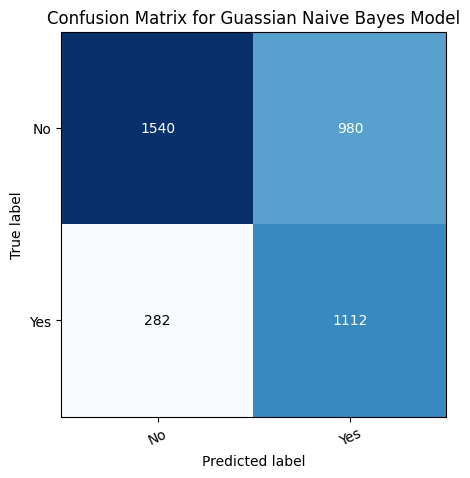

In [114]:
#Confusion Matrix for Drinking Purpose
matrix = confusion_matrix(y1_test,nb5_pre)
class_names=['No','Yes']
fig,ax=plot_confusion_matrix(conf_mat=matrix,figsize=(5,5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Guassian Naive Bayes Model')
plt.show()

In [115]:
# Performance Metrics for Drinking Purpose
def find_TP(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'Yes')) # True Positives
def find_FN(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'No')) # False Negatives Type-II error
def find_FP(y, y_hat):
   return sum((y == 'No') & (y_hat == 'Yes')) # False Positives Type-I error
def find_TN(y, y_hat):
   return sum((y == 'No') & (y_hat == 'No')) # True Negatives
TP=(find_TP(y1_test,nb5_pre))
TN=(find_TN(y1_test,nb5_pre))
FN=(find_FN(y1_test,nb5_pre))
FP=(find_FP(y1_test,nb5_pre))
print('True Positive:',TP)
print('True Negative:',TN)
print('False Positive:',FP)
print('False Negative:',FN)
accuracy=(TP+TN)/(TP+FP+TN+FN)
print('Accuracy:',accuracy)
acc33=accuracy*100
if TP==0:
  precision=0
  recall=0
  f1_score=0
else:
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  f1_score = 2*((precision*recall)/(precision+recall))
print('Precision:',precision)
print('Recall:',recall)
print('F1 score:',f1_score)
if TN==0:
  specificity=0
else:
  specificity=TN/(TN+FP)
print('Specificity:',specificity)

True Positive: 1112
True Negative: 1540
False Positive: 980
False Negative: 282
Accuracy: 0.6775677056719469
Precision: 0.5315487571701721
Recall: 0.7977044476327116
F1 score: 0.6379804934021802
Specificity: 0.6111111111111112


In [116]:
#Ailments
#Fitting the model
nb6=classifier_nb.fit(X_train, y2_train)
nb6_pre=nb6.predict(X_test)
acc46=accuracy_score(y2_test, nb6_pre) # Accuracy
print(acc46)
acc46*=100

0.7023505365355135


In [117]:
#Cement Industry Purpose
#Fitting the model
nb7=classifier_nb.fit(X_train, y3_train)
nb7_pre=nb7.predict(X_test)
acc47=accuracy_score(y3_test,nb7_pre) # Accuracy
print(acc47)
acc47*=100

0.6624936126724579


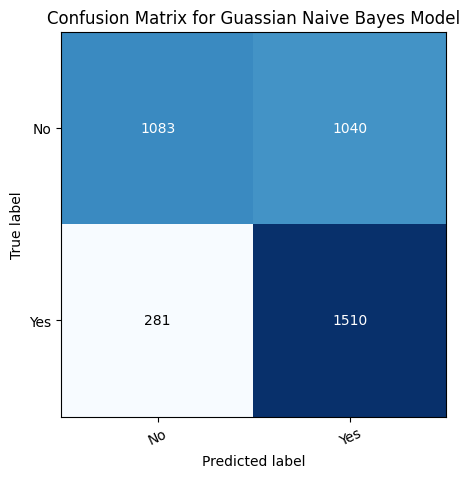

In [118]:
#Confusion Matrix for Cement Industry Purpose
matrix = confusion_matrix(y3_test,nb7_pre)
class_names=['No','Yes']
fig,ax=plot_confusion_matrix(conf_mat=matrix,figsize=(5,5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Guassian Naive Bayes Model')
plt.show()

In [119]:
# Performance Metrics for Cement Industry Purpose
def find_TP(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'Yes')) # True Positives
def find_FN(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'No')) # False Negatives Type-II error
def find_FP(y, y_hat):
   return sum((y == 'No') & (y_hat == 'Yes')) # False Positives Type-I error
def find_TN(y, y_hat):
   return sum((y == 'No') & (y_hat == 'No')) # True Negatives
TP=(find_TP(y3_test,nb7_pre))
TN=(find_TN(y3_test,nb7_pre))
FN=(find_FN(y3_test,nb7_pre))
FP=(find_FP(y3_test,nb7_pre))
print('True Positive:',TP)
print('True Negative:',TN)
print('False Positive:',FP)
print('False Negative:',FN)
accuracy=(TP+TN)/(TP+FP+TN+FN)
print('Accuracy:',accuracy)
acc27=accuracy*100
if TP==0:
  precision=0
  recall=0
  f1_score=0
else:
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  f1_score = 2*((precision*recall)/(precision+recall))
print('Precision:',precision)
print('Recall:',recall)
print('F1 score:',f1_score)
if TN==0:
  specificity=0
else:
  specificity=TN/(TN+FP)
print('Specificity:',specificity)

True Positive: 1510
True Negative: 1083
False Positive: 1040
False Negative: 281
Accuracy: 0.6624936126724579
Precision: 0.592156862745098
Recall: 0.8431044109436069
F1 score: 0.6956922368117945
Specificity: 0.5101271785209609


In [120]:
#Irrigation Purpose
#Training the model
nb8=classifier_nb.fit(X_train, y4_train)
nb8_pre=nb8.predict(X_test)
acc48=accuracy_score(y4_test,nb8_pre) # Accuracy
print(acc48)
acc48*=100

0.7864077669902912


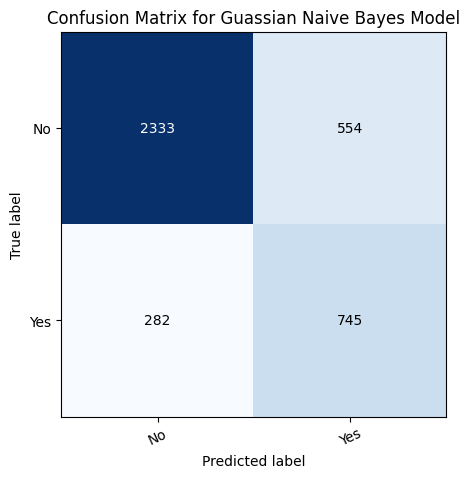

In [121]:
#Confusion Matrix for Irrigation Purpose
matrix = confusion_matrix(y4_test,nb8_pre)
class_names=['No','Yes']
fig,ax=plot_confusion_matrix(conf_mat=matrix,figsize=(5,5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Guassian Naive Bayes Model')
plt.show()

In [122]:
# Performance Metrics for Irrigation Purpose
def find_TP(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'Yes')) # True Positives
def find_FN(y, y_hat):
   return sum((y == 'Yes') & (y_hat == 'No')) # False Negatives Type-II error
def find_FP(y, y_hat):
   return sum((y == 'No') & (y_hat == 'Yes')) # False Positives Type-I error
def find_TN(y, y_hat):
   return sum((y == 'No') & (y_hat == 'No')) # True Negatives
TP=(find_TP(y4_test,nb8_pre))
TN=(find_TN(y4_test,nb8_pre))
FN=(find_FN(y4_test,nb8_pre))
FP=(find_FP(y4_test,nb8_pre))
print('True Positive:',TP)
print('True Negative:',TN)
print('False Positive:',FP)
print('False Negative:',FN)
accuracy=(TP+TN)/(TP+FP+TN+FN)
print('Accuracy:',accuracy)
acc25=accuracy*100
if TP==0:
  precision=0
  recall=0
  f1_score=0
else:
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  f1_score = 2*((precision*recall)/(precision+recall))
print('Precision:',precision)
print('Recall:',recall)
print('F1 score:',f1_score)
if TN==0:
  specificity=0
else:
  specificity=TN/(TN+FP)
print('Specificity:',specificity)

True Positive: 745
True Negative: 2333
False Positive: 554
False Negative: 282
Accuracy: 0.7864077669902912
Precision: 0.573518090839107
Recall: 0.7254138266796495
F1 score: 0.6405846947549441
Specificity: 0.8081052996189816


#### Prediction

In [123]:
'''ph=round(float(input()),2)
Ca=round(float(input()),2)
Mg=round(float(input()),2)
Cl=round(float(input()),2)
Ben=round(float(input()),2)
THM=round(float(input()),2)
Cu=round(float(input()),2)
Ni=round(float(input()),2)
Xtest1=[[ph,Ca,Mg,Cl,Ben,THM,Cu,Ni]]
X_test1=pd.DataFrame(Xtest1)
X_test1.rename(columns = {0: 'Ph',1:'Calcium(in ppm)',2:'Magnesium(in ppm)',3:'Chlorine(in ppm)',4:'Benzene(in ppb)',5:'THM(in ppb)',6:'Copper(in ppm)',7:'Nitrate(in ppm)',9:'Drinking Purpose',10:'Ailments',11:'Cement Industry Purpose',12:'Irrigation Purpose'}, inplace = True)
X_test1'''

"ph=round(float(input()),2)\nCa=round(float(input()),2)\nMg=round(float(input()),2)\nCl=round(float(input()),2)\nBen=round(float(input()),2)\nTHM=round(float(input()),2)\nCu=round(float(input()),2)\nNi=round(float(input()),2)\nXtest1=[[ph,Ca,Mg,Cl,Ben,THM,Cu,Ni]]\nX_test1=pd.DataFrame(Xtest1)\nX_test1.rename(columns = {0: 'Ph',1:'Calcium(in ppm)',2:'Magnesium(in ppm)',3:'Chlorine(in ppm)',4:'Benzene(in ppb)',5:'THM(in ppb)',6:'Copper(in ppm)',7:'Nitrate(in ppm)',9:'Drinking Purpose',10:'Ailments',11:'Cement Industry Purpose',12:'Irrigation Purpose'}, inplace = True)\nX_test1"

In [124]:
nb5=classifier_nb.fit(X_train, y1_train)
nb_pre1=nb5.predict(X_test1)
nb6=classifier_nb.fit(X_train, y2_train)
nb_pre2=nb6.predict(X_test1)
nb7=classifier_nb.fit(X_train, y3_train)
nb_pre3=nb7.predict(X_test1)
nb8=classifier_nb.fit(X_train, y4_train)
nb_pre4=nb8.predict(X_test1)
print('Drinking Purpose: '+nb_pre1[0])
print('Ailments: '+nb_pre2[0])
print('Cement Industry Purpose: '+nb_pre3[0])
print('Irrigation Purpose: '+nb_pre4[0])

Drinking Purpose: No
Ailments: Anaemia,Nausea,Bladder Cancer,Methemoglobinemia,Diarrhoea,Leukaemia
Cement Industry Purpose: No
Irrigation Purpose: No


### Comparison Table

In [125]:
from prettytable import PrettyTable
table = PrettyTable(['Algorithm', '4 features', 'concatenating 4 features','2 features','concatenating 2 features','Drinking Purpose','Ailments','Cement Industry Purpose','Irrigation Purpose'])
l=[["Random Forest",round(acc1,2),round(acc2,2),round(acc3,2),round(acc4,2),round(acc5,2),round(acc6,2),round(acc7,2),round(acc8,2)],
   ["KNN",round(acc9,2),round(acc10,2),round(acc11,2),round(acc12,2),round(acc13,2),round(acc14,2),round(acc15,2),round(acc16,2)],
   ["Decision Tree",round(acc17,2),round(acc18,2),round(acc19,2),round(acc20,2),round(acc21,2),round(acc22,2),round(acc23,2),round(acc24,2)],
   ["SVM(rbf)",round(acc25,2),round(acc26,2),round(acc27,2),round(acc28,2),round(acc29,2),round(acc30,2),round(acc31,2),round(acc32,2)],
   ["SVM(poly)",round(acc33,2),round(acc34,2),round(acc35,2),round(acc36,2),round(acc37,2),round(acc38,2),round(acc39,2),round(acc40,2)],
   ["Naive Bayes",round(acc41,2),round(acc42,2),round(acc43,2),round(acc44,2),round(acc45,2),round(acc46,2),round(acc47,2),round(acc48,2)]]
for rec in l:
    table.add_row(rec)
print(table)

+---------------+------------+--------------------------+------------+--------------------------+------------------+----------+-------------------------+--------------------+
|   Algorithm   | 4 features | concatenating 4 features | 2 features | concatenating 2 features | Drinking Purpose | Ailments | Cement Industry Purpose | Irrigation Purpose |
+---------------+------------+--------------------------+------------+--------------------------+------------------+----------+-------------------------+--------------------+
| Random Forest |   91.11    |          91.57           |   91.82    |          91.95           |      92.59       |   92.0   |          92.41          |       92.54        |
|      KNN      |   57.97    |          58.51           |    66.2    |          66.81           |      92.59       |  66.81   |          83.39          |       92.39        |
| Decision Tree |   87.07    |          87.81           |   87.71    |          87.84           |      87.25       |  88.07  